In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv'
)

In [ ]:
#The goal of this analysis is to identify and compare one high-volume school in queens and one high-volume school in Manhattan by looking at their performance in 2015 for Common Core Algebra for the K-8 kids and determine if their performance increased or decreased in 2017. I am defining high-volume as having 90 or more test takers and I'm using the values in the "Total Tested" column to make this determination. I will do this comparison between 2015 and 2017 performance by looking at the two data points "Mean Score" and "Percent Scoring 80 or Above".

In [3]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [ ]:
#Before I can start the analysis, I will need to do some data cleaning to remove missing values.

In [5]:
missing_values=["na", "n/a", "_", "s"]
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
na_values = missing_values)

In [6]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
 13 

In [ ]:
#Now that I have completed by data cleaning, I will need to apply filters to the data that I want to see to conduct my analysis. I will start with filtering for the 2015 data.  I will filter the data to look only at Common Core Algebra for the K-8 kids that had 90 or more that took tests and the school had more than 30% of their population score 80 or above on the test.  I also filterd the "Mean Score" column to look at rows that had 0 and above to remove the "NaN" values.

In [10]:
Df5 = df[(df['Regents Exam'] == 'Common Core Algebra') & (df['Year'] == 2015) & (df['School Level'] == 'K-8') & (df['Total Tested'] >=90) & (df['Mean Score'] >=0) & (df['Percent Scoring 80 or Above'] >=30)]

In [11]:
Df5

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
324,02M126,P.S. 126 Jacob August Riis,K-8,Common Core Algebra,2015,114,74.6,17.0,14.9,97.0,85.1,40.0,35.1,89.0,78.1
13437,24Q119,I.S. 119 The Glendale,K-8,Common Core Algebra,2015,166,82.4,4.0,2.4,162.0,97.6,99.0,59.6,150.0,90.4
20041,02M126,P.S. 126 Jacob August Riis,K-8,Common Core Algebra,2015,93,78.6,3.0,3.2,90.0,96.8,40.0,43.0,86.0,92.5
88046,24Q119,I.S. 119 The Glendale,K-8,Common Core Algebra,2015,123,82.3,2.0,1.6,121.0,98.4,69.0,56.1,112.0,91.1


In [ ]:
#After applying the filtering, P.S. 126 Jacob August Riis in Manhattan and I.S. 119 The Glendale schools in Queens were identified.  However, I can see that both schools appear on two rows each. If I want to combine the data to complete my analysis, I would need to use the GroupBy function to agregate the data. 

In [12]:
School_Scores_2015 = Df5.groupby("School Name") ["Mean Score"].mean().sort_values()

Text(0, 0.5, 'Mean Score')

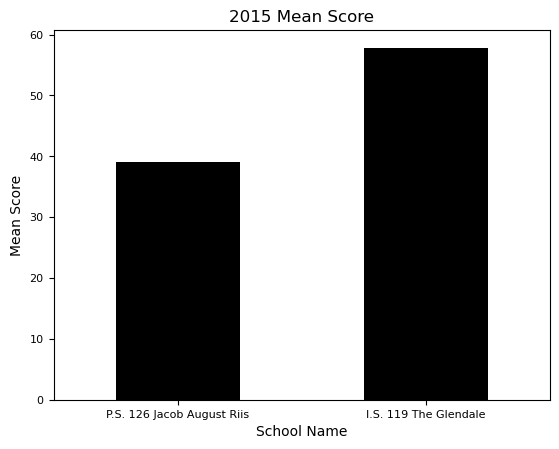

In [59]:
School_Scores_2015.plot(x="School Name", y="Mean Score", kind="bar", rot=0, fontsize=8, color='k')
plt.title("2015 Mean Score")
plt.ylabel("Mean Score")

In [17]:
Df5.groupby(["School Name"])["Mean Score"].mean()

School Name
I.S. 119 The Glendale         82.35
P.S. 126 Jacob August Riis    76.60
Name: Mean Score, dtype: float64

In [14]:
School_Scores_2015 = Df5.groupby("School Name") ["Percent Scoring 80 or Above"].mean().sort_values()

Text(0, 0.5, 'Percent Score')

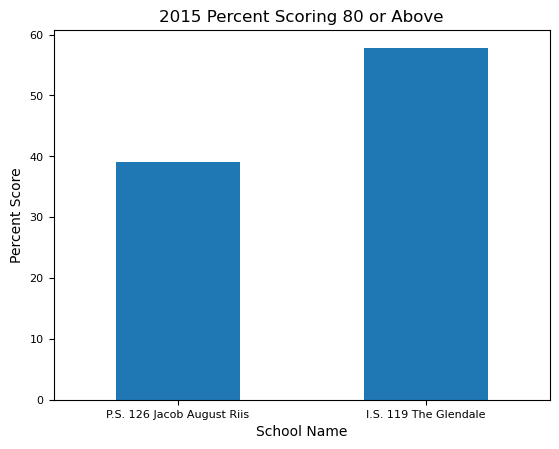

In [61]:
School_Scores_2015.plot(x="School Name", y="Percent Scoring 80 or Above", kind="bar", rot=0, fontsize=8)
plt.title("2015 Percent Scoring 80 or Above")
plt.ylabel("Percent Score")

In [18]:
Df5.groupby(["School Name"])["Percent Scoring 80 or Above"].mean()

School Name
I.S. 119 The Glendale         57.85
P.S. 126 Jacob August Riis    39.05
Name: Percent Scoring 80 or Above, dtype: float64

In [ ]:
#As demonstrated by the bar graphs above and tables, I.S. 119 The Glendale had a higher mean among their test takers at 82.35% in comparison to P.S.126 Jacob August Riis at 76.60%.  I.S. 199 The Glendale also had a higher percentage of test takers that scored 80 or above at 57.85% in comparison to P.S. 126 Jacob August Riis at 39.05%.

In [ ]:
#Now that I have reviewed 2015 performance data, I will review 2017 performance data for Common Core Algebra for both schools using the same filters.

In [19]:
Df6 = df[(df['Regents Exam'] == 'Common Core Algebra') & (df['Year'] == 2017) & (df['School Level'] == 'K-8') & (df['Total Tested'] >=90) & (df['Mean Score'] >=0)]

In [20]:
Df6

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
326,02M126,P.S. 126 Jacob August Riis,K-8,Common Core Algebra,2017,103,79.9,16.0,15.5,87.0,84.5,75.0,72.8,85.0,82.5
13439,24Q119,I.S. 119 The Glendale,K-8,Common Core Algebra,2017,109,92.3,1.0,0.9,108.0,99.1,106.0,97.2,108.0,99.1
20045,02M126,P.S. 126 Jacob August Riis,K-8,Common Core Algebra,2017,91,82.8,7.0,7.7,84.0,92.3,74.0,81.3,83.0,91.2
43504,24Q119,I.S. 119 The Glendale,K-8,Common Core Algebra,2017,109,92.3,1.0,0.9,108.0,99.1,106.0,97.2,108.0,99.1
88050,24Q119,I.S. 119 The Glendale,K-8,Common Core Algebra,2017,94,92.4,1.0,1.1,93.0,98.9,92.0,97.9,93.0,98.9


In [ ]:
#Similiar to what was done for 2015 data, I will also need to use the Groupby function to aggregate the data since each school's data appear on two rows each.

In [21]:
School_Scores_2017 = Df6.groupby("School Name") ["Mean Score"].mean().sort_values()

Text(0, 0.5, 'Mean Score')

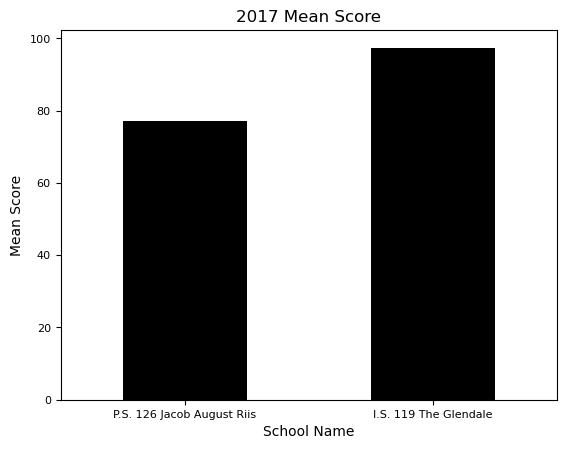

In [62]:
School_Scores_2017.plot(x="School Name", y="Mean Score", kind="bar", rot=0, fontsize=8, color='k')
plt.title("2017 Mean Score")
plt.ylabel("Mean Score")

In [24]:
Df6.groupby(["School Name"])["Mean Score"].mean()

School Name
I.S. 119 The Glendale         92.333333
P.S. 126 Jacob August Riis    81.350000
Name: Mean Score, dtype: float64

In [25]:
School_Scores_2017 = Df6.groupby("School Name") ["Percent Scoring 80 or Above"].mean().sort_values()

Text(0, 0.5, 'Percent Score')

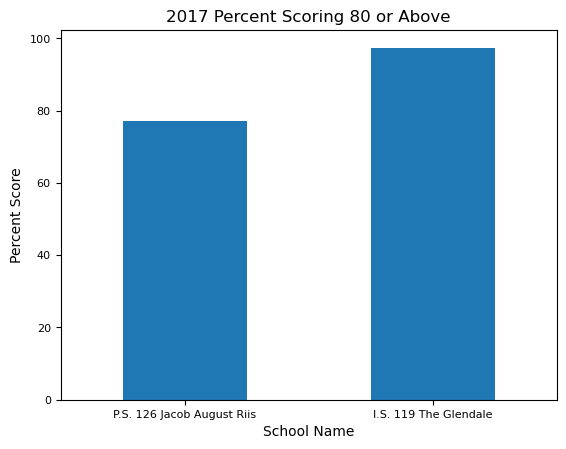

In [63]:
School_Scores_2017.plot(x="School Name", y="Percent Scoring 80 or Above", kind="bar", rot=0, fontsize=8)
plt.title("2017 Percent Scoring 80 or Above")
plt.ylabel("Percent Score")

In [27]:
Df6.groupby(["School Name"])["Percent Scoring 80 or Above"].mean()

School Name
I.S. 119 The Glendale         97.433333
P.S. 126 Jacob August Riis    77.050000
Name: Percent Scoring 80 or Above, dtype: float64

In [ ]:
#As demonstrated by the bar graphs above and tables, I.S. 119 The Glendale had a higher mean score at 92.33% in comparison to P.S.126 Jacob August Riis at 81.35%.  I.S. 199 The Glendale also had a higher percentage of test takers that scored 80 or above at 97.43% in comparison to P.S. 126 Jacob August Riis at 77.05%.

In [ ]:
#Now that I have looked at the performance for 2015 and 2017 separately for both schools, I will compare performance scores between 2015 and 2017 to see how much improvement was achieved and which school demonstrated the most improvement.

In [52]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Score')

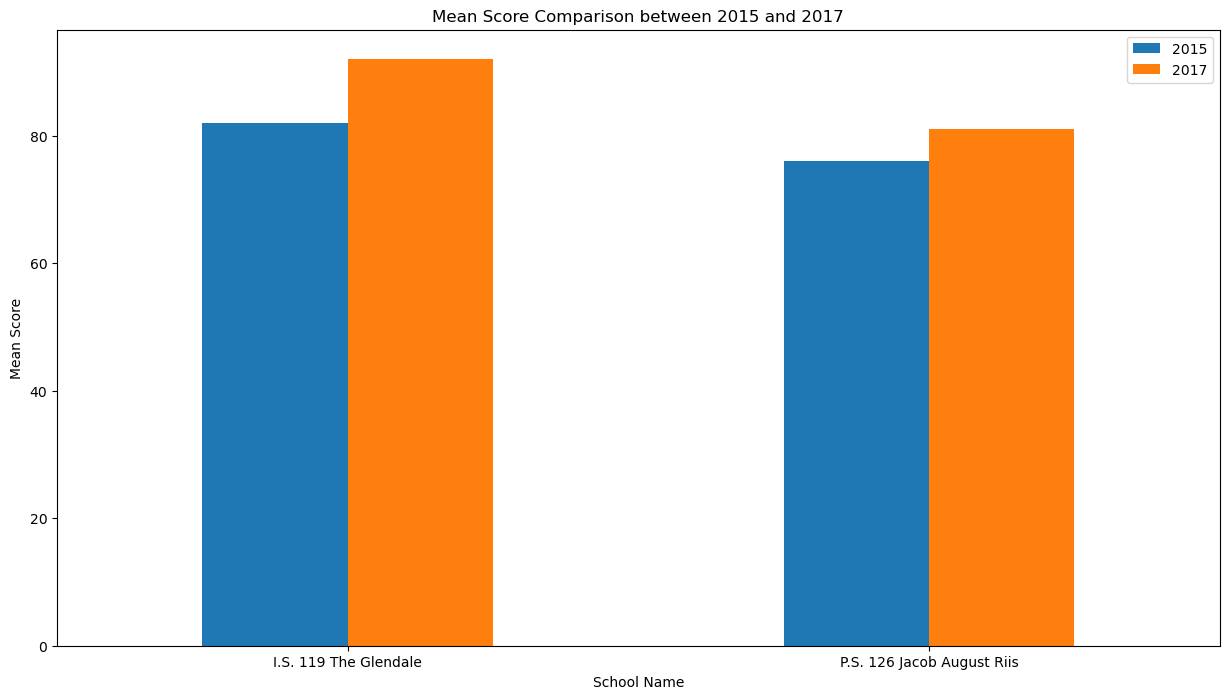

In [56]:
plotdata = pd.DataFrame({
    "2015":[82,76],
    "2017":[92,81]},
    index=["I.S. 119 The Glendale", "P.S. 126 Jacob August Riis"])
plotdata.plot(kind="bar",figsize=(15,8), rot=0)
plt.title("Mean Score Comparison between 2015 and 2017")
plt.xlabel("School Name")
plt.ylabel("Mean Score")

In [ ]:
#As demonstrated from the bar graph above, I.S. 119 The Glendale school in Queens had the most improvement over P.S. 126 Jacob August Riis in Manhattan.  The Glendale performance increased 12% in 2017 from 2015 in comparison to Jacob August Riis 6% improvement. Furthermore, in both years, The Glendale School had higher scores than Jacob August Riis School by 6 percentage points in 2015 and 11 percentage points in 2017. 

Text(0, 0.5, 'Percent Scoring 80 or Above')

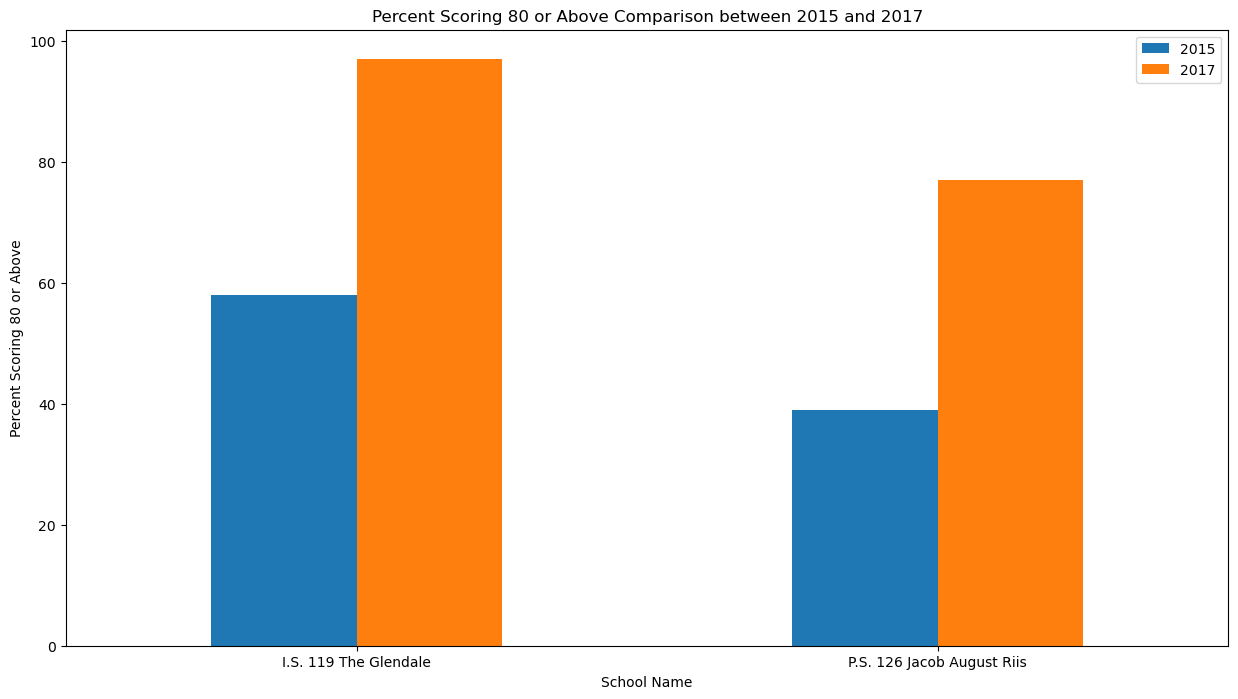

In [57]:
plotdata = pd.DataFrame({
    "2015":[58,39],
    "2017":[97,77]},
    index=["I.S. 119 The Glendale", "P.S. 126 Jacob August Riis"])
plotdata.plot(kind="bar",figsize=(15,8), rot=0)
plt.title("Percent Scoring 80 or Above Comparison between 2015 and 2017")
plt.xlabel("School Name")
plt.ylabel("Percent Scoring 80 or Above")

In [ ]:
#In contrast to the Mean Score, and as indicated by the bar graph above looking at "Percent Scoring 80 or Above" in 2015 and 2017, The Jacob August Riis school showed more improvement from 2015 to 2017 by 97% in comparison to The Glendale's 41% change. However, The Glendale School still outperformed Jacob August Riis by the overall percentage of test takers that scored 80 or above by 19 percentage points in 2015 and 20 percentage points in 2017.

In [ ]:
#The I.S. 119 The Glendale School in Queens, New York outperforms P.S. 126 Jacob August Riis School in Manhatten by having a higher Mean Score and having a higher percentage of test takers scoring 80 or above. Additionally, The Glendale School had a higher increase in their Mean Score from 2015 to 2017. While the Glendale School also had a signicant increase in the percent of test takers scoring 80 or above from 2015 to 2017, the Jacob August Riis School experienced a much higher improvement by 97% in comparison to The Glendale's school 41% increase.   